In [20]:
!nvidia-smi

Wed Aug 21 15:34:36 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.239.06   Driver Version: 470.239.06   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A40          Off  | 00000000:01:00.0 Off |                    0 |
|  0%   37C    P0    77W / 300W |   1360MiB / 45634MiB |     22%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla P40           Off  | 00000000:C1:00.0 Off |                    0 |
| N/A   

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from models.stutterModel import StutterDetectionModel_FC, StutterDetectionModel_LSTM
from utils.read_audio import create_dataloader

In [3]:
os.listdir()

['checkpoints',
 'train.py',
 '.DS_Store',
 'utils',
 'ler_dados.ipynb',
 'models',
 'data',
 'coraa']

In [5]:
label_mapping = create_label_mapping(data)
audio_paths = data['file_path'].tolist()
audio_paths = ["data/"+path for path in audio_paths]

In [15]:
file_path_tr = 'data/train/meta_data_treino.csv'
file_path_test = 'data/test/meta_data_test.csv'
data_tr = pd.read_csv(file_path_tr)
data_test = pd.read_csv(file_path_test)

# Criar os DataLoaders
dataloader_tr = create_dataloader(data_tr, batch_size=32)
dataloader_test = create_dataloader(data_test, batch_size=32)

In [16]:
next(iter(dataloader_tr))

KeyError: Caught KeyError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/filhoij/.local/lib/python3.10/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
  File "/home/filhoij/.local/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/filhoij/.local/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 51, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/filhoij/Documents/CEIA/disfluency/projeto_residual_bi_lstm/utils/read_audio.py", line 50, in __getitem__
    label = self.label_mapping[audio_path]
KeyError: 'data/train/NURC_RE/NURC_RE_DID/NURC_RE_DID_193/177622_nurc_.wav'


In [16]:
audio_paths[0]

'data/test/sp/42881_sp_.wav'

In [17]:
audio_path = audio_paths[0]
waveform, sample_rate = torchaudio.load(audio_path)
n_fft = 512
win_length = 400
hop_length = 160
n_mels = 100

spectrogram = torchaudio.transforms.MelSpectrogram(
    sample_rate = sample_rate,
    n_fft = n_fft,
    win_length = win_length,
    hop_length = hop_length,
    n_mels = n_mels
)(waveform)


In [8]:
spectrogram.shape

torch.Size([1, 100, 314])

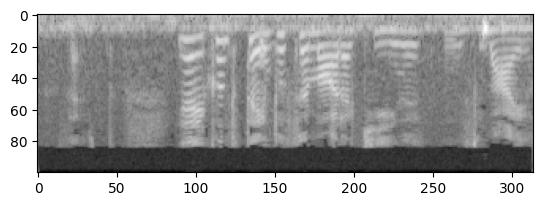

In [12]:
plt.imshow(torch.log10(spectrogram.squeeze()), cmap = "gray")